In [15]:
from _Setup import *

In [16]:
train = pd.read_csv(missForestTrainFile)
test = pd.read_csv(missForestTestFile)
test_submission = pd.read_csv(rawSubmissionFile)
validation = pd.read_csv(validationFile)

# logistic regression 

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [18]:
#selected_variables = ['time', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       #'Resp', 'BaseExcess', 'FiO2', 'pH', 'PaCO2', 'BUN', 'Calcium',
       #'Creatinine', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'Hgb', 'WBC',
       #'Platelets', 'Age', 'HospAdmTime', 'ICULOS', 'Shock', 'patient',
       #'Gender', 'Unit1', 'Unit2', 'Fever', 'TCP', 'TCA', 'LEU']

selected_variables = [ 'time','O2Sat', 'MAP',
       'BaseExcess', 'FiO2', 'PaCO2', 'Calcium',
       'Creatinine', 'Glucose', 'Magnesium', 'Potassium', 'Hct',
       'Platelets', 'Age', 'Gender', 'Unit1', 'Fever', 'TCP', 'TCA', 'LEU']

#selected_variables = ['time', 'O2Sat', 'SBP', 'MAP', 'BaseExcess', 'pH', 'PaCO2', 'BUN', 'Calcium', 
                      #'Creatinine', 'Glucose', 'Potassium', 'Hct', 'Age', 'Gender', 'Unit1', 'Fever', 'TCA', 'TCP', 'LEU']

train = train[selected_variables + ['SepsisLabel']]
test = test[selected_variables]
validation = validation[selected_variables + ['SepsisLabel']]

In [19]:
X_train = train.drop(columns=['SepsisLabel'])
y_train = train['SepsisLabel']
X_val = validation.drop(columns=['SepsisLabel'])
y_val = validation['SepsisLabel']

In [20]:
X_train_scaled_const = sm.add_constant(X_train)
X_test_scaled_const = sm.add_constant(X_val)
test = sm.add_constant(test)

In [21]:
model = sm.Logit(y_train, X_train_scaled_const)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.512305
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            SepsisLabel   No. Observations:              1198330
Model:                          Logit   Df Residuals:                  1198309
Method:                           MLE   Df Model:                           20
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                  0.1437
Time:                        16:36:26   Log-Likelihood:            -6.1391e+05
converged:                       True   LL-Null:                   -7.1692e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6996      0.008   -334.034      0.000      -2.715      -2.684
time           0.4171      0.

In [22]:
y_pred = result.predict(X_test_scaled_const)  
y_pred_classes1 = (y_pred >= 0.60).astype(int)  

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_classes1))
print("\nClassification Report:\n", classification_report(y_val, y_pred_classes1))

Confusion Matrix:
 [[208567   4058]
 [  3269    656]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    212625
         1.0       0.14      0.17      0.15      3925

    accuracy                           0.97    216550
   macro avg       0.56      0.57      0.57    216550
weighted avg       0.97      0.97      0.97    216550



In [23]:
y_pred_t = result.predict(test) 
y_pred_classes = (y_pred_t >= 0.6).astype(int)

In [24]:
test_submission['SepsisLabel'] = y_pred_classes

In [25]:
#test_submission.to_csv('submission.csv', index=False)

In [26]:
#print(test_submission)

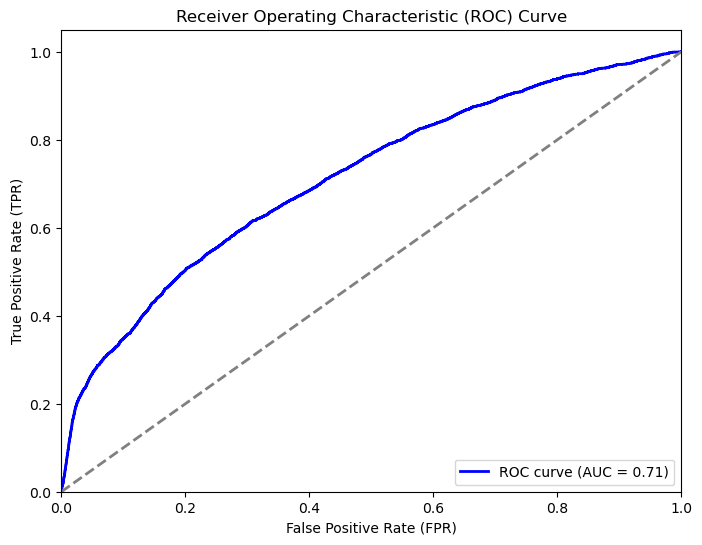

AUC Score: 0.71


In [27]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)  # Compute false positive rate, true positive rate
roc_auc = auc(fpr, tpr)  # Compute the AUC score

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f'AUC Score: {roc_auc:.2f}')

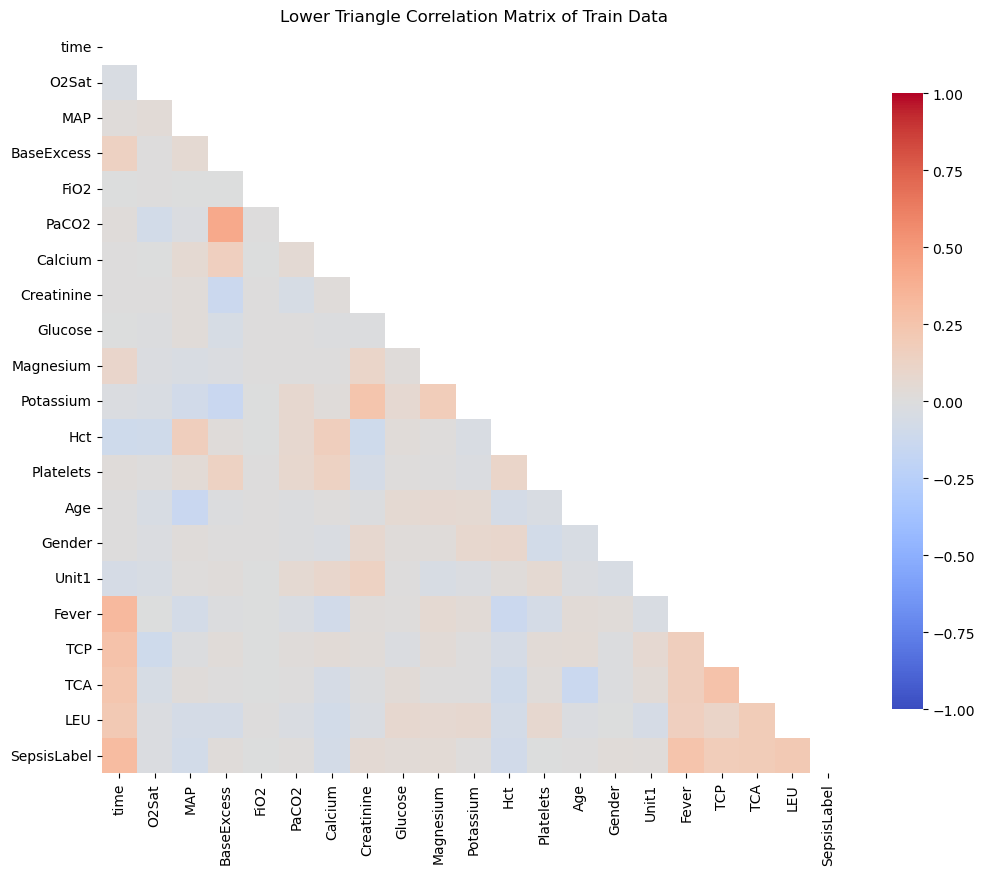

In [28]:
correlation_matrix = train.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix, masking the upper triangle
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)

# Set the title
plt.title('Lower Triangle Correlation Matrix of Train Data')
plt.savefig('Plots/corrmat_train_imputed.png')
plt.show()